In [222]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка датасета

In [186]:
wine = datasets.load_wine()
X = wine.data 
y = wine.target

## Признаки и целевая переменная

In [187]:
print("Feature names:")
for index, feature_name in enumerate(wine.feature_names):
    print(str(index) + "-th column: " + feature_name)

Feature names:
0-th column: alcohol
1-th column: malic_acid
2-th column: ash
3-th column: alcalinity_of_ash
4-th column: magnesium
5-th column: total_phenols
6-th column: flavanoids
7-th column: nonflavanoid_phenols
8-th column: proanthocyanins
9-th column: color_intensity
10-th column: hue
11-th column: od280/od315_of_diluted_wines
12-th column: proline


In [188]:
print("Target names:")
for index, target_name in enumerate(wine.target_names):
    print(str(index) + ": " + target_name)

Target names:
0: class_0
1: class_1
2: class_2


## Деление на тренировочную и тестовую выборки

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [190]:
X_train.shape, y_train.shape

((142, 13), (142,))

In [191]:
X_test.shape, y_test.shape

((36, 13), (36,))

## Визуализация некоторых признаков и их зависимостей

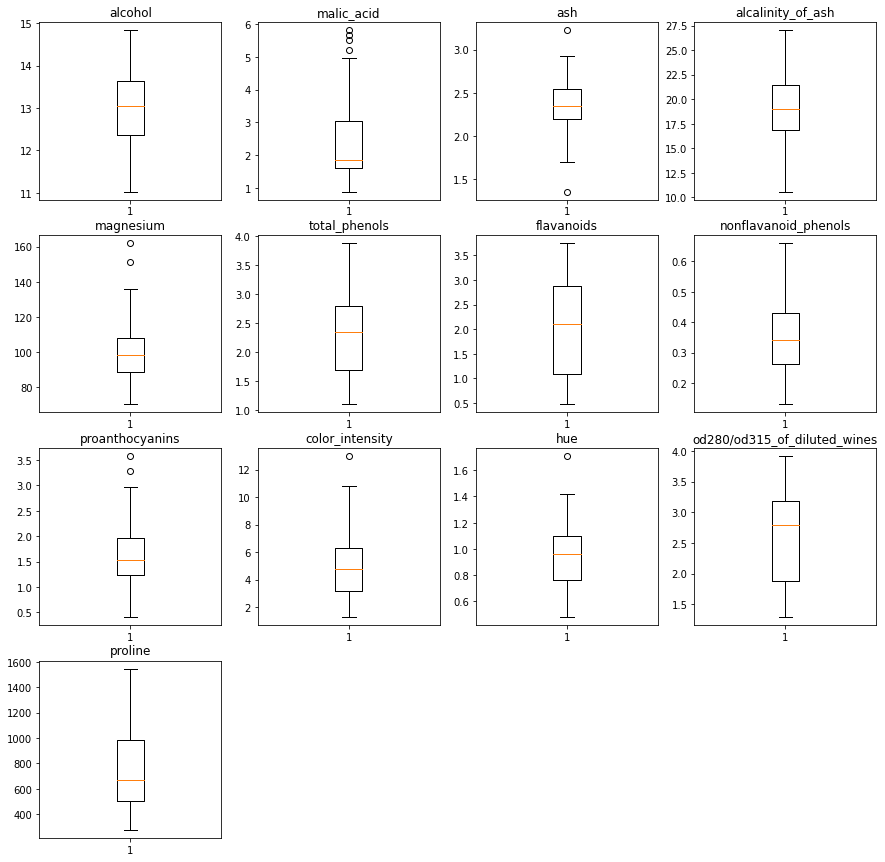

In [196]:
plt.figure(figsize=(15, 15))

for index, feature_name in enumerate(wine.feature_names):
    plt.subplot(4, 4, index+1)
    plt.boxplot(x = X_train[:, index])
    plt.title(feature_name)

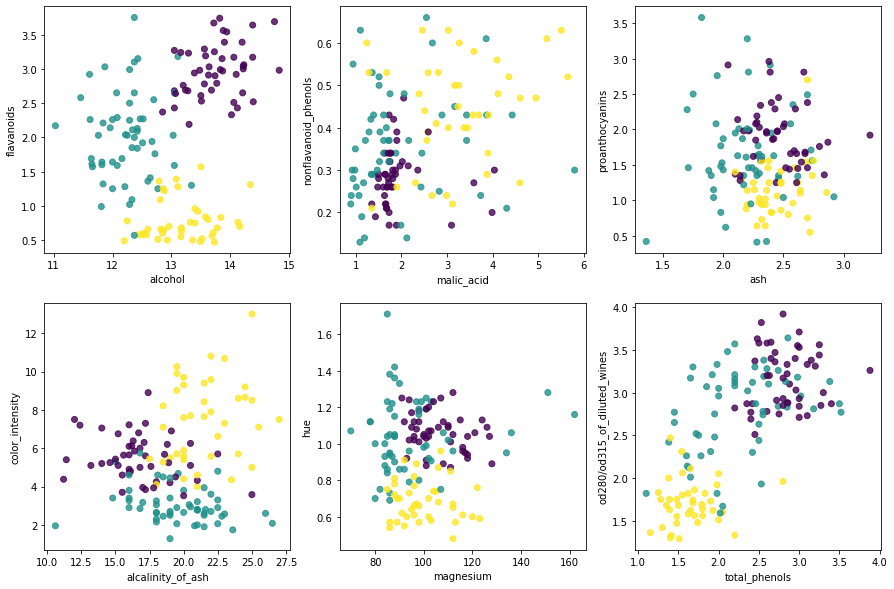

In [203]:
plt.figure(figsize=(15, 10))

x_list = [0, 1, 2, 3, 4, 5]
y_list = [6, 7, 8, 9, 10, 11]
for index, (x, y) in enumerate(zip(x_list, y_list)): 
    plt.subplot(2, 3, index+1)
    plt.scatter(x = X_train[:, x], y = X_train[:, y], c=y_train, alpha=0.8)
    plt.xlabel(wine.feature_names[x])
    plt.ylabel(wine.feature_names[y])

## kNN

In [210]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Accuracy: " + str(accuracy_score(y_test, knn.predict(X_test))))

Accuracy: 0.6388888888888888


Попытаемся подобрать гипперпараметры для модели

## kNN с использованием поиска по сетке гипперпараметров

In [211]:
grid_searcher = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = {
        "n_neighbors": list(range(1, 12, 3)),
        "weights": ['uniform', 'distance'],
        "p": [1, 2, 3]
    },
    cv = 5
)

In [212]:
grid_searcher.fit(X_train, y_train)
grid_searcher.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [213]:
best_knn = grid_searcher.best_estimator_
print("Accuracy: " + str(accuracy_score(y_test, best_knn.predict(X_test))))

Accuracy: 0.6944444444444444


В результате перебора сетки были получены гипперпараметры, которые дают более высокое значения метрики. Попробуем поискать наилучшее значение для гипперпараметра k, закрепив параметры p и weights

## kNN для разных к

In [215]:
metrics = []

for n_neighbor in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n_neighbor, p=1, weights='distance')
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    metrics.append(accuracy)

Text(0, 0.5, 'Accuracy')

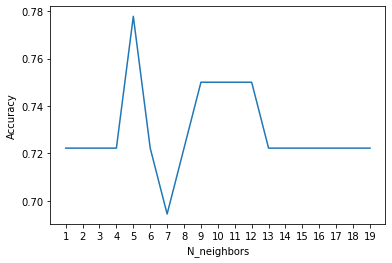

In [216]:
plt.plot(list(range(1, 20)), metrics)
plt.xlabel("N_neighbors")
plt.xticks(range(1, 20))
plt.ylabel("Accuracy")

По графику видно, что лучшая метрика достигается при k=5

In [217]:
knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='distance')
knn.fit(X_train, y_train)
print("Accuracy: " + str(accuracy_score(y_test, knn.predict(X_test))))

Accuracy: 0.7777777777777778


## Итоги

В результате с помощью алгоритма kNN удалось без предварительной подготовки и анализа получить долю верных ответов, равную 77 процентам.

Ниже представлен отчет по классификации. По нему видно, что модели наиболее сложно работать с 2-ым классом

In [229]:
print(classification_report(y_test, knn.predict(X_test), target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.91      0.83      0.87        12
     class_1       0.85      0.69      0.76        16
     class_2       0.58      0.88      0.70         8

    accuracy                           0.78        36
   macro avg       0.78      0.80      0.78        36
weighted avg       0.81      0.78      0.78        36

